#Atividade 4 - LEA

Site escolhido para realizar o Web Scraping: [Agência Gov - Esportes](https://https://agenciagov.ebc.com.br/noticias/esporte?b_start:int=0)

In [ ]:
import requests
from bs4 import BeautifulSoup

Aqui eu começo simulando um navegador para evitar bloqueio do site

In [ ]:
url = "https://agenciagov.ebc.com.br/noticias/esporte?b_start:int=0"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

Depois faço a requisição para ter o HTML da página inicial

In [ ]:
response = requests.get(url, headers=headers)
response

<Response [200]>

Com ajuda do BeautfulSoup transformo o HTML em um objeto que facilite a obtenção de informações. Em seguida visualizo somente as partes em texto do código para que eu consiga identificar de forma mais facilitada onde estão as informações de notícias que eu preciso.

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")
soup

<!DOCTYPE html>

<html lang="pt-br" xml:lang="pt-br" xmlns="http://www.w3.org/1999/xhtml">
<head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-M3VLKN3J');</script>
<!-- End Google Tag Manager -->
<title>Esporte — Agência Gov</title>
<link href="/++plone++ebc.agenciagov.images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/++plone++ebc.agenciagov.images/apple-touch-icon.png" rel="apple-touch-icon"/>
<link href="/++plone++ebc.agenciagov.images/android-chrome-192x192.png" rel="icon" sizes="192x192" type="image/png"/>
<link href="/++plone++ebc.agenciagov.images/android-c

In [ ]:
print(soup.get_text())







Esporte — Agência Gov

















agência gov


notícias gov |
            canal gov |
            rádio gov |
            distribuição de conteúdo





















Busca

buscar












Busca









notícias gov
canal gov
rádio gov
distribuição de conteúdo










Acessar

























Notícias Gov
Esporte








18/12/2024 14:42
Esporte 2024
Governo avança na criação de políticas públicas para a transição e dupla carreira dos atletas brasileiros










17/12/2024 12:58
Esporte
Esporte 2024: Ministério do Esporte inaugurou 11 núcleos para atender pessoas com TEA










17/12/2024 10:20
Apoio do Bolsa Atleta
Retrospectiva 2024: potencial dos atletas brasileiros foi destaque nos Jogos de Paris










16/12/2024 18:54
Alicerce do esporte
Em ano Olímpico, atletas exaltam o papel do Bolsa Atleta em suas carreiras










16/12/2024 18:34
Incentivo
2024: o ano do Bolsa Atleta, que há duas décadas transforma o esporte brasileiro










16/12/2

Agora, é possível entender dentro do código do site as classes onde estão as informações das notícias. Aqui eu denominei essas partes como bloco_noticias.

In [ ]:
bloco_noticias = soup.find("section", class_="noticias-gov no-margin mobile-section")

bloco_noticias

<section class="noticias-gov no-margin mobile-section">
<h1 class="titulo-pagina">Notícias Gov</h1>
<h3 class="subtitulo-pagina">Esporte</h3>
<ul class="demais-noticias">
<li class="noticia pagina-noticias">
<a href="https://agenciagov.ebc.com.br/noticias/202412/esporte-2024-ministerio-do-esporte-avanca-na-criacao-de-politicas-publicas-para-a-transicao-e-dupla-carreira-dos-atletas-brasileiros">
<div class="imagem-16-9">
<img class="noticia-img" src="https://agenciagov.ebc.com.br/noticias/202412/esporte-2024-ministerio-do-esporte-avanca-na-criacao-de-politicas-publicas-para-a-transicao-e-dupla-carreira-dos-atletas-brasileiros/@@images/image/preview"/>
</div>
<div class="caixa-texto-noticia">
<!--<div class="tema tema-noticia" tal:content="obj/editoria">política</div>-->
<div class="data-noticia">18/12/2024 14:42</div>
<p class="chapeu noticias-chapeu">Esporte 2024</p>
<p class="titulo-noticia bg-titulo-noticia">Governo avança na criação de políticas públicas para a transição e dupla car

Com base nos blocos de noticia que eu identifiquei, eu extrai os links de cada notícia para uso posterior, principalmente para a extração das informações importantes para minha analise fututra que estão contidas em cada um desses links.

In [ ]:
#Extrair os links da página
links = [a['href'] for a in bloco_noticias.find_all('a', href=True)]
for link in links:
    print(link)

https://agenciagov.ebc.com.br/noticias/202412/esporte-2024-ministerio-do-esporte-avanca-na-criacao-de-politicas-publicas-para-a-transicao-e-dupla-carreira-dos-atletas-brasileiros
https://agenciagov.ebc.com.br/noticias/202412/esporte-2024-ministerio-do-esporte-inaugurou-11-nucleos-para-atender-pessoas-com-tea
https://agenciagov.ebc.com.br/noticias/202412/potencial-do-time-brasil-e-destaque-nos-jogos-de-paris-2024
https://agenciagov.ebc.com.br/noticias/202412/em-ano-olimpico-atletas-exaltam-o-papel-do-bolsa-atleta-em-suas-carreiras
https://agenciagov.ebc.com.br/noticias/202412/2024-o-ano-do-bolsa-atleta-que-ha-20-anos-transforma-o-esporte-brasileiro
https://agenciagov.ebc.com.br/noticias/202412/ministerio-do-esporte-esta-com-inscricoes-abertas-para-os-cursos-gratuitos-e-on-line-na-area-do-futebol
https://agenciagov.ebc.com.br/noticias/202412/copa-do-mundo-feminina-de-2027-ja-tem-datas-definidas-pela-fifa
https://agenciagov.ebc.com.br/noticias/202412/com-datas-definidas-brasil-se-prepara-

In [ ]:
links = [link for link in links if "/noticias/2024" in link]

for link in links:
    print(link)

https://agenciagov.ebc.com.br/noticias/202412/esporte-2024-ministerio-do-esporte-avanca-na-criacao-de-politicas-publicas-para-a-transicao-e-dupla-carreira-dos-atletas-brasileiros
https://agenciagov.ebc.com.br/noticias/202412/esporte-2024-ministerio-do-esporte-inaugurou-11-nucleos-para-atender-pessoas-com-tea
https://agenciagov.ebc.com.br/noticias/202412/potencial-do-time-brasil-e-destaque-nos-jogos-de-paris-2024
https://agenciagov.ebc.com.br/noticias/202412/em-ano-olimpico-atletas-exaltam-o-papel-do-bolsa-atleta-em-suas-carreiras
https://agenciagov.ebc.com.br/noticias/202412/2024-o-ano-do-bolsa-atleta-que-ha-20-anos-transforma-o-esporte-brasileiro
https://agenciagov.ebc.com.br/noticias/202412/ministerio-do-esporte-esta-com-inscricoes-abertas-para-os-cursos-gratuitos-e-on-line-na-area-do-futebol
https://agenciagov.ebc.com.br/noticias/202412/copa-do-mundo-feminina-de-2027-ja-tem-datas-definidas-pela-fifa
https://agenciagov.ebc.com.br/noticias/202412/com-datas-definidas-brasil-se-prepara-


Aqui, para comnpilar apenas os links de notícias eu identifiquei algo que fosse comum entre esses links das mesmas e fazer essa "filtragem". No meu caso o que havia de comum era o /noticias/2024

In [ ]:
response = requests.get(link, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
soup

<!DOCTYPE html>

<html lang="pt-br" xml:lang="pt-br" xmlns="http://www.w3.org/1999/xhtml">
<head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-M3VLKN3J');</script>
<!-- End Google Tag Manager -->
<title>Cerimônia abre Jogos da Juventude em João Pessoa (PB) — Agência Gov</title>
<link href="/++plone++ebc.agenciagov.images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/++plone++ebc.agenciagov.images/apple-touch-icon.png" rel="apple-touch-icon"/>
<link href="/++plone++ebc.agenciagov.images/android-chrome-192x192.png" rel="icon" sizes="192x192" type="image/png"/>
<link h

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")
print(soup.get_text(separator="\n").strip())

Cerimônia abre Jogos da Juventude em João Pessoa (PB) — Agência Gov




































agência gov






notícias gov
 |
            
canal gov
 |
            
rádio gov
 |
            
distribuição de conteúdo












































Busca




buscar


























Busca




















notícias gov


canal gov


rádio gov


distribuição de conteúdo






















Acessar




















































Esporte


Cerimônia abre Jogos da Juventude em João Pessoa (PB)


Até o próximo dia 28 de novembro, a capital da Paraíba recebe jovens de 13 a 17 anos de todo o país, para disputas em 18 modalidades esportivas




Compartilhar




































































































Agência Gov | Via MEsp


14/11/2024 10:15










Ana Patrícia/COB






Os Jogos da Juventude Caixa 2024 foram oficialmente abertos nesta quarta-feira (13/11), no Centro de Convenções

Nesta etapa, com base na estrutura dos códigos dos links das noticias realizei a extração das informações que fariam sentido na minha análise, como título, descrição e data. Eu tentei extrair de alguma forma as tags que estavam contidas em cada noticia mas posteriormente explico o motivo de não ter sido possível.

In [ ]:
#título
title = soup.find("meta", property="og:title")["content"]

#descrição
description = soup.find("meta", attrs={"name": "description"})["content"]

#indexações (tags)
tags = [tag["content"] for tag in soup.find_all("meta", attrs={"name": "keywords"})]

#data
date_tag = soup.find("meta", attrs={"name": "DC.date.modified"})
#nesse caso deixei uma mensagem caso não fosse possível extrair a data especificamente
date = date_tag["content"] if date_tag else "Data não disponível"

#resultados
print("Título:", title)
print("Descrição:", description)
print("Indexações:", tags)
print("Data:", date)

Título: Cerimônia abre Jogos da Juventude em João Pessoa (PB)
Descrição: Até o próximo dia 28 de novembro, a capital da Paraíba recebe jovens de 13 a 17 anos de todo o país, para disputas em 18 modalidades esportivas
Indexações: ['Ministério do Esporte (MEsp), Jogos da Juventude']
Data: 2024-11-14T12:16:36-03:00


Aqui eu observei dentro do código como eu conseguia identificar o bloco de texto da noticia, no caso é: texto-conteudo

In [ ]:
texto_materia = soup.find("div", class_="texto-conteudo")

#manipulacao do texto
texto = texto_materia.get_text(separator="\n").strip()
texto

'Os Jogos da Juventude Caixa 2024 foram oficialmente abertos nesta quarta-feira (13/11), no Centro de Convenções de João Pessoa, na Paraíba, com uma série de novidades e a presença de autoridades do esporte, medalhistas olímpicos e 4.200 atletas juvenis. O Ministério do Esporte esteve representado pela secretária nacional de Excelência Esportiva, Iziane Marques.\n\n\n\n\n“Os Jogos da Juventude são uma competição que celebra o futuro do esporte em nosso país. É uma oportunidade de apoiar o esporte de base e o desenvolvimento pessoal dos atletas que almejam o alto rendimento. O Ministério do Esporte está comprometido em garantir que esses jovens atletas tenham o apoio necessário para desenvolverem todo o seu potencial, inclusive com o suporte do programa Bolsa Atleta”, afirmou Iziane Marques\n\n\n\n\nHá mais de 20 anos, os Jogos da Juventude fazem parte do caminho de desenvolvimento de atletas brasileiros e são uma competição reconhecida pelo Comitê Olímpico Brasileiro (COB) para inscriç

In [ ]:
informacoes = {
    "titulo": title,
    "descricao": description,
    "tags": tags,
    "texto": texto,
    "data": date,
}
informacoes

{'titulo': 'Cerimônia abre Jogos da Juventude em João Pessoa (PB)',
 'descricao': 'Até o próximo dia 28 de novembro, a capital da Paraíba recebe jovens de 13 a 17 anos de todo o país, para disputas em 18 modalidades esportivas',
 'tags': ['Ministério do Esporte (MEsp), Jogos da Juventude'],
 'texto': 'Os Jogos da Juventude Caixa 2024 foram oficialmente abertos nesta quarta-feira (13/11), no Centro de Convenções de João Pessoa, na Paraíba, com uma série de novidades e a presença de autoridades do esporte, medalhistas olímpicos e 4.200 atletas juvenis. O Ministério do Esporte esteve representado pela secretária nacional de Excelência Esportiva, Iziane Marques.\n\n\n\n\n“Os Jogos da Juventude são uma competição que celebra o futuro do esporte em nosso país. É uma oportunidade de apoiar o esporte de base e o desenvolvimento pessoal dos atletas que almejam o alto rendimento. O Ministério do Esporte está comprometido em garantir que esses jovens atletas tenham o apoio necessário para desenvo

In [ ]:
import time
import random

Com base em todo o estudo de estrutura feito acima realizei a iteração das notícias por página. No caso do site que eu escolhi, as páginas não são numeradas por ordem crescente começando no 1 e aumentando como é habitualmente, e sim por número das notícias, começando com as 20 primeiras e aumentando a cada 20. Por isso, precisei criar uma variável que fizesse o número da página atual vezes 20.
Além disso, é necessário colocar um tempo de espera para acessar a próxima página, para que não haja um bloqueio de acesso do site.

In [ ]:
numero_paginas = 5
links_noticias = []

for p in range(numero_paginas):
    b_start = p * 20
    url = f"https://agenciagov.ebc.com.br/noticias/esporte?b_start:int={b_start}"
    response = requests.get(url, headers=headers)

    print(p, response)

    soup = BeautifulSoup(response.text, "html.parser")
    bloco_noticias = soup.find("section", class_="noticias-gov no-margin mobile-section")

    if bloco_noticias:
        links = [a['href'] for a in bloco_noticias.find_all('a', href=True)]
        links = [link for link in links if "/noticias/2024" in link]

        links_noticias += links

    tempo_espera = random.uniform(0, 0.1)
    time.sleep(tempo_espera)

print(links_noticias)

In [ ]:
len(links_noticias)


100

Nesta etapa eu processei cada link de notícia, extrai as informações relevantes da página e salvei essas informações em arquivos JSON. Também inseri algumas situações de erro que acabei encontrando ao ir rodando o código, como por exemplo a tag <meta name='description'> não estava presente no código html, ou quando o meu código encontrou um texto que estivesse fora das especificações anteriores.
Um ponto importante sobre as tags que eu havia mencionado anteriormente é que na página geral de noticias há tags associadas a cada notícia, como no expemplo da imagem a seguir:
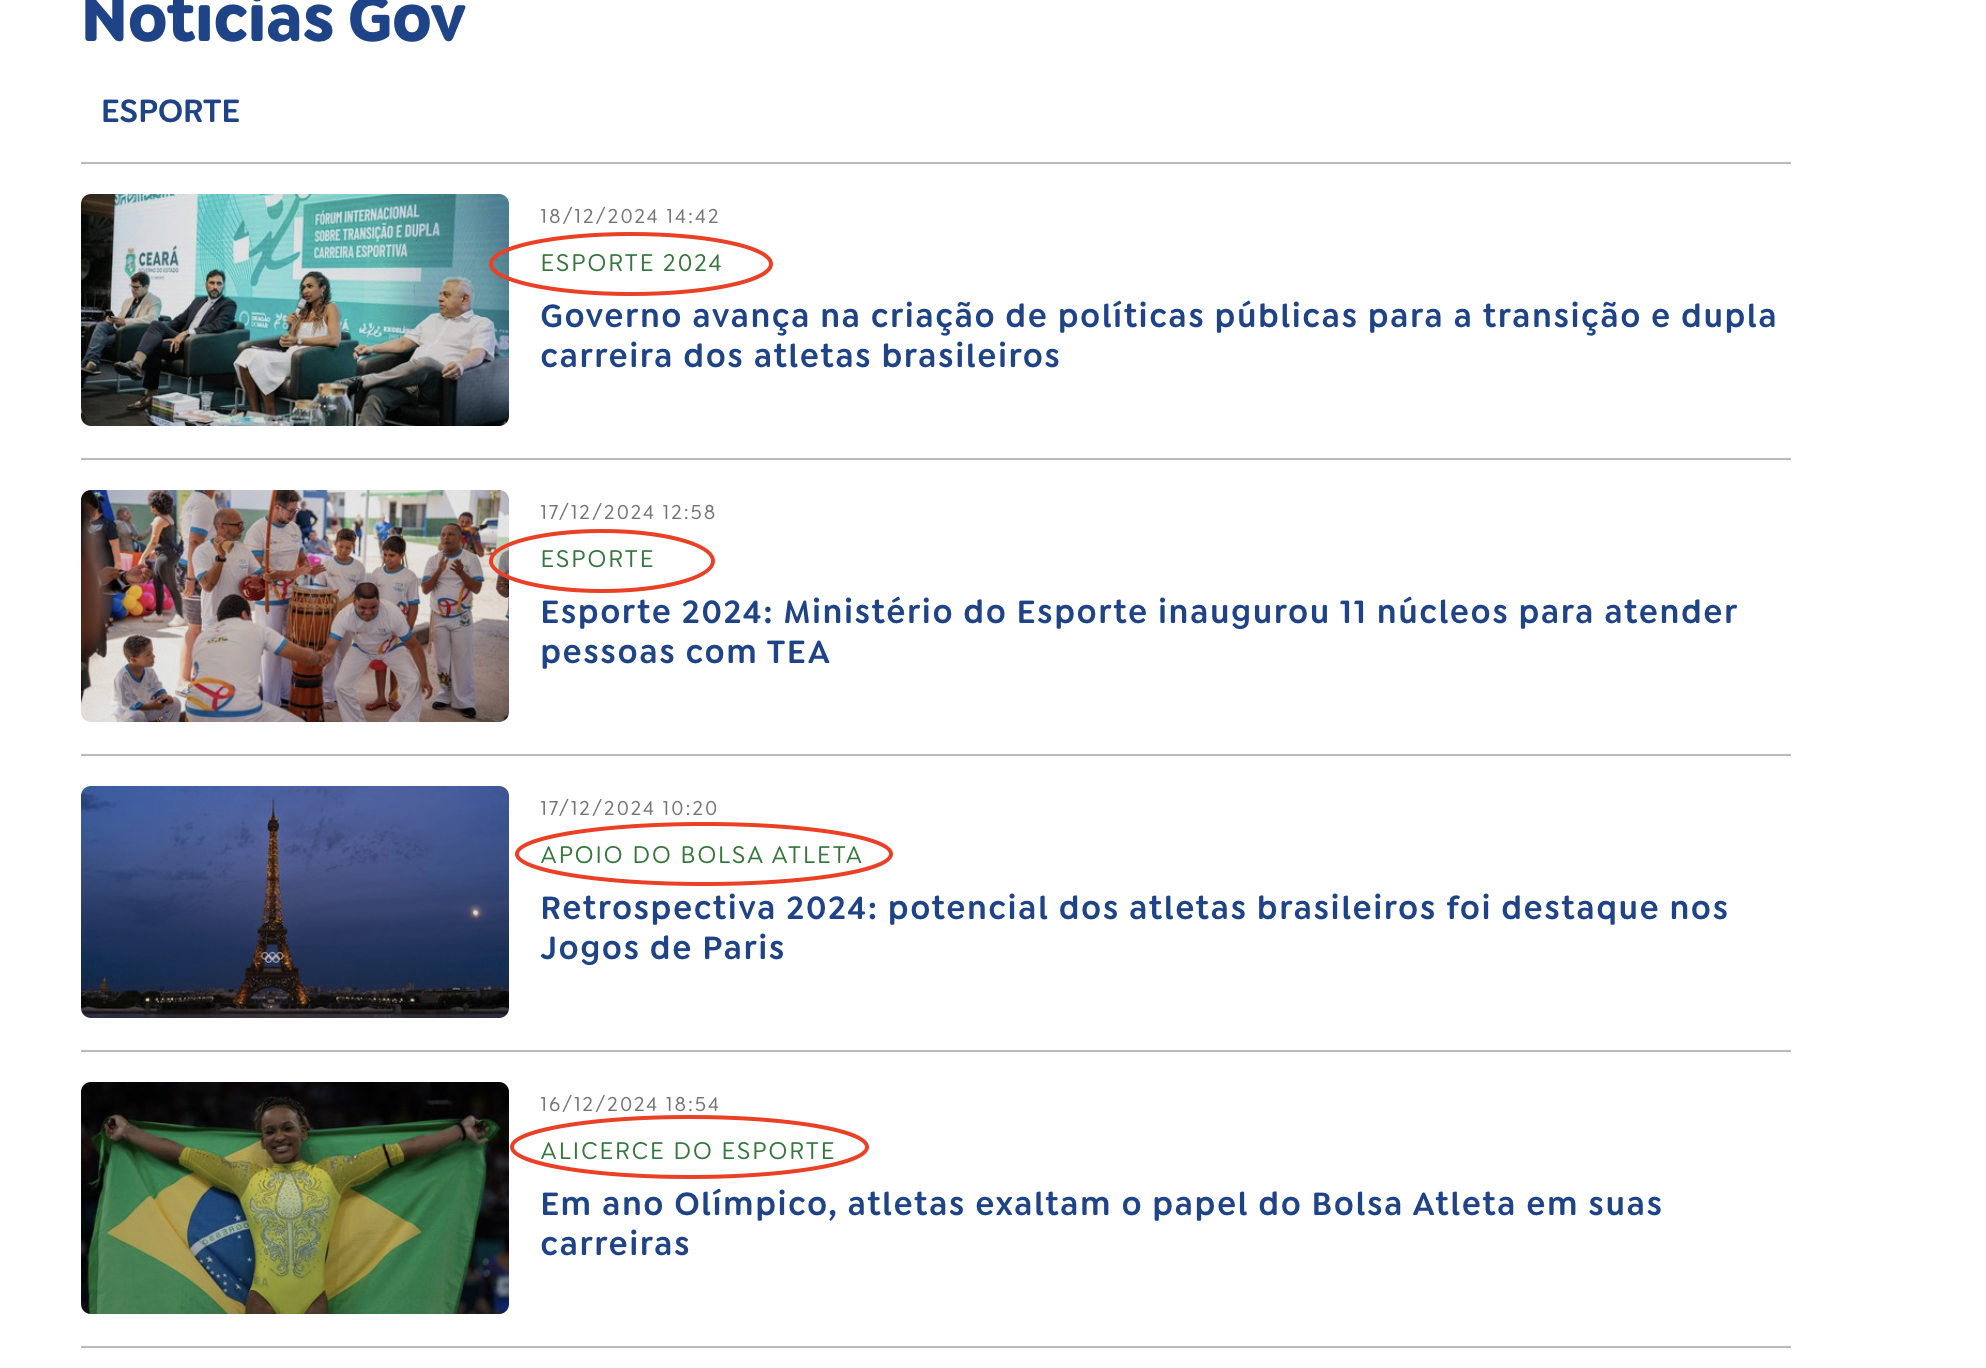

Porém como essas tags não estão especificadas dentro dos links das noticias elas não foram extraidas, por isso todas aparecem em branco na base de dados.

In [23]:
import json
import pathlib
import requests
from bs4 import BeautifulSoup
import random
import time

def buscar_meta(soup, nome_meta):
    tag = soup.find("meta", attrs={"name": nome_meta})
    return tag["content"] if tag else None

data_dir = pathlib.Path("data")  #diretório para os arquivos salvos
data_dir.mkdir(exist_ok=True)

for i, link in enumerate(links_noticias):
    base_url = "https://agenciagov.ebc.com.br/noticias/esporte"

    response = requests.get(link, headers=headers)

    soup = BeautifulSoup(response.text, "html.parser")

    #título
    title = soup.find("meta", property="og:title")["content"] if soup.find("meta", property="og:title") else "Título não disponível"

    #descrição
    description = buscar_meta(soup, "description")
    if description is None:
        print(f"A descrição não foi encontrada neste link")
        description = "Descrição não disponível"

    #tags
    tags = [tag["content"] for tag in soup.find_all("meta", attrs={"name": "keywords"})]

    #data
    date_tag = soup.find("meta", attrs={"name": "DC.date.modified"})
    date = date_tag["content"] if date_tag else "Data não disponível"

    #texto da noticia
    texto_materia = soup.find("div", class_="texto-conteudo")
    if texto_materia:
        texto = texto_materia.get_text(separator="\n").strip()
    else:
        print(f"O texto da matéria não foi encontrado no link.")
        texto = "Texto não disponível"

    #informacoes
    informacoes = {
        "url": link,
        "titulo": title,
        "descricao": description,
        "tags": tags,
        "texto": texto,
        "data": date,
    }

    #nome dos arquivos json
    filename = f"noticia_{i}.json"
    file_path = data_dir / filename

    with file_path.open("w", encoding="utf-8") as f:
        json.dump(informacoes, f, ensure_ascii=False, indent=4)

    print(f"Arquivo salvo: {file_path}")

    tempo_espera = random.uniform(0, .5)
    time.sleep(tempo_espera)


Arquivo salvo: data/noticia_0.json
Arquivo salvo: data/noticia_1.json
Arquivo salvo: data/noticia_2.json
Arquivo salvo: data/noticia_3.json
Arquivo salvo: data/noticia_4.json
Arquivo salvo: data/noticia_5.json
Arquivo salvo: data/noticia_6.json
Arquivo salvo: data/noticia_7.json
Arquivo salvo: data/noticia_8.json
Arquivo salvo: data/noticia_9.json
Arquivo salvo: data/noticia_10.json
Arquivo salvo: data/noticia_11.json
Arquivo salvo: data/noticia_12.json
Arquivo salvo: data/noticia_13.json
Arquivo salvo: data/noticia_14.json
Arquivo salvo: data/noticia_15.json
Arquivo salvo: data/noticia_16.json
Arquivo salvo: data/noticia_17.json
Arquivo salvo: data/noticia_18.json
Arquivo salvo: data/noticia_19.json
Arquivo salvo: data/noticia_20.json
Arquivo salvo: data/noticia_21.json
Arquivo salvo: data/noticia_22.json
Arquivo salvo: data/noticia_23.json
Arquivo salvo: data/noticia_24.json
Arquivo salvo: data/noticia_25.json
Arquivo salvo: data/noticia_26.json
Arquivo salvo: data/noticia_27.json
Ar

##Análise Descritiva

Nesta etapa realizei a analise descritiva das noticias extraidas do site. Nesse primeiro momento fiz um gráfico com as palavras-chave e sua relevancia nos textos. Como esperado a palavra "esporte" possui a maior relevancia, seguida por "Atletas", "Brasil" e "Jogos". Essas palavras fazem muito sentido no contexto do ano de 2024 em que passamos por olimpiadas e paraolimpiadas, eventos esportivos extremamente importantes.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palavras-chave e relevância:
atletas: 25.021122821806955
brasil: 21.241785092265086
bronze: 13.527466637593738
classe: 11.79020571341804
esporte: 45.44046568478432
final: 13.503124077810076
jogos: 19.47238601568843
medalha: 13.627101337247733
paralímpicos: 12.368564160041233
paris: 14.590625511456127


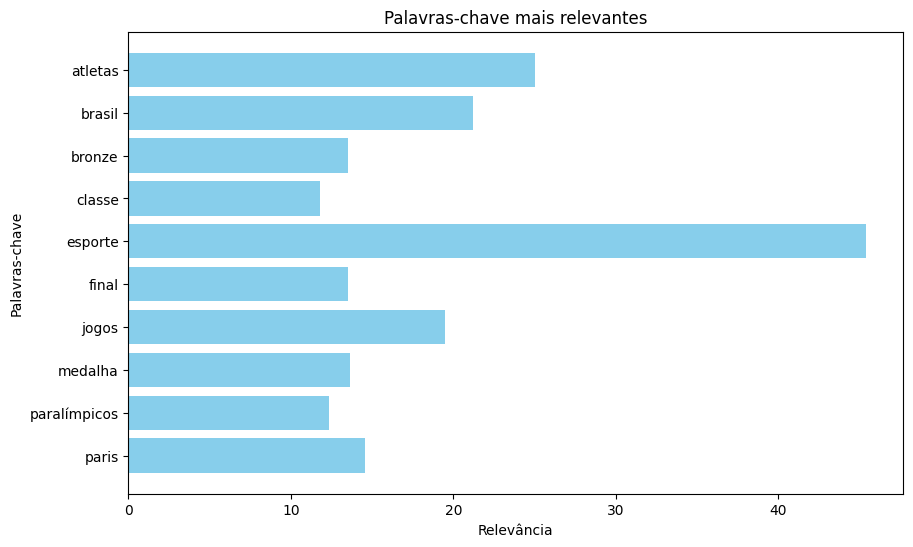

In [25]:
import json
import pathlib
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

#stopwords em português
nltk.download("stopwords")
stop_words  = stopwords.words("portuguese")

data_dir = pathlib.Path("data")

def carregar_textos(data_dir):
    textos = []
    for file_path in data_dir.glob("*.json"):
        with file_path.open(encoding="utf-8") as f:
            data = json.load(f)
            textos.append(data.get("texto", ""))
    return textos

def extracao_palavras(textos, num_palavras=10):
    vectorizer = TfidfVectorizer(max_features=num_palavras, stop_words=stop_words)
    X = vectorizer.fit_transform(textos)
    palavras_chave = vectorizer.get_feature_names_out()
    relevancia = X.toarray().sum(axis=0)
    return palavras_chave, relevancia

textos = carregar_textos(data_dir)

palavras_chave, relevancia = extracao_palavras(textos)

print("Palavras-chave e relevância:")
for palavra, importancia in zip(palavras_chave, relevancia):
    print(f"{palavra}: {importancia}")

#grafico de barras
plt.figure(figsize=(10, 6))
plt.barh(palavras_chave, relevancia, color="skyblue")
plt.xlabel("Relevância")
plt.ylabel("Palavras-chave")
plt.title("Palavras-chave mais relevantes")
plt.gca().invert_yaxis()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


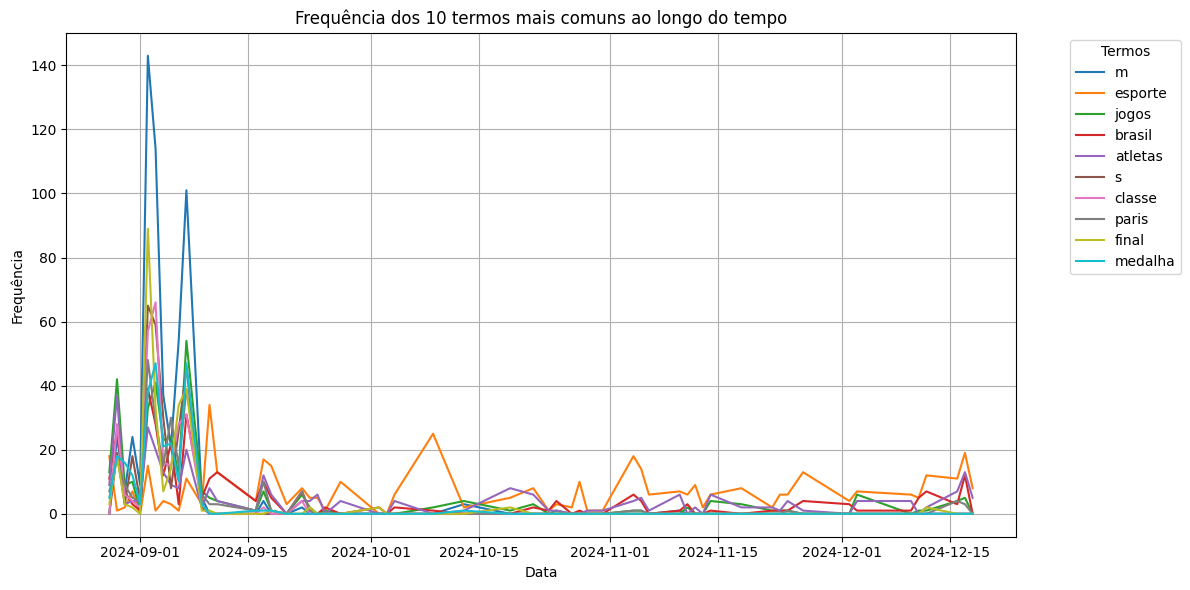

In [27]:
import json
import pathlib
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

noticias = [json.load(f.open(encoding="utf-8")) for f in pathlib.Path("data").glob("*.json")]
dados = [{"data": n["data"][:10], "texto": n["texto"].lower()} for n in noticias]

df = pd.DataFrame(dados)
df["data"] = pd.to_datetime(df["data"], errors="coerce")
df = df.dropna(subset=["data"])
df["contagem"] = df["texto"].apply(lambda t: Counter(w for w in re.sub(r'[^a-záéíóúãõàâêîôûàç ]', '', t).split() if w not in stop_words))
freq_dia = df.groupby("data")["contagem"].sum()
freq_df = pd.DataFrame(freq_dia.items(), columns=["data", "contagem"]).sort_values("data")

todas_as_palavras = Counter()
for c in freq_df["contagem"]:
    todas_as_palavras.update(c)

top_termos = [w for w, _ in todas_as_palavras.most_common(10)]
resultados = pd.DataFrame([{**{"data": d}, **{t: c.get(t, 0) for t in top_termos}} for d, c in freq_df.itertuples(index=False)]).set_index("data")

plt.figure(figsize=(12, 6))
for termo in top_termos:
    plt.plot(resultados.index, resultados[termo], label=termo)
plt.title("Frequência dos 10 termos mais comuns ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Frequência")
plt.legend(title="Termos", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



Na figura acima está o gráfico de frequência por dia dos 10 termos que mais aparecem nas matérias. Duas letras se destacam no gráfico e fui mais afundo para entender o motivo. Como o assunto trata de esportes essas letras são utilizadas como medidas de espaço e tempo (m - metros) e (s - segundos), por isso é bem comum que sejam consideradas como palavras de grande frequência nos textos desse tipo.

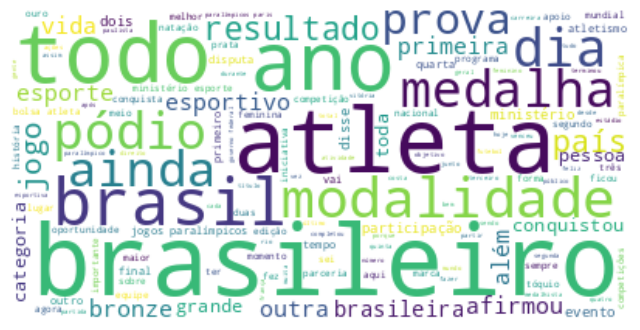

In [31]:
from wordcloud import WordCloud

noticias = [json.load(f.open(encoding="utf-8")) for f in pathlib.Path("data").glob("*.json")]
dados = [{"data": n["data"][:10], "texto": n["texto"].lower()} for n in noticias]

def contar_palavras(texto):
    texto_limpo = re.sub(r'[^a-záéíóúãõàâêîôûàç ]', '', texto)
    return Counter(p for p in texto_limpo.split() if p not in stop_words)

df = pd.DataFrame(dados)
df["contagem"] = df["texto"].apply(contar_palavras)

todas_as_palavras = ' '.join([p for texto in df["texto"] for p in contar_palavras(texto).keys()])
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(todas_as_palavras)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Nesta figura realizei uma nuvem de palavras simples apra entender quais palavras mais aparecem no geral. Como é possível notar, muitas palavras relacionadas aos jogos olímpicos aparecem, como pódio, medalha, etc.

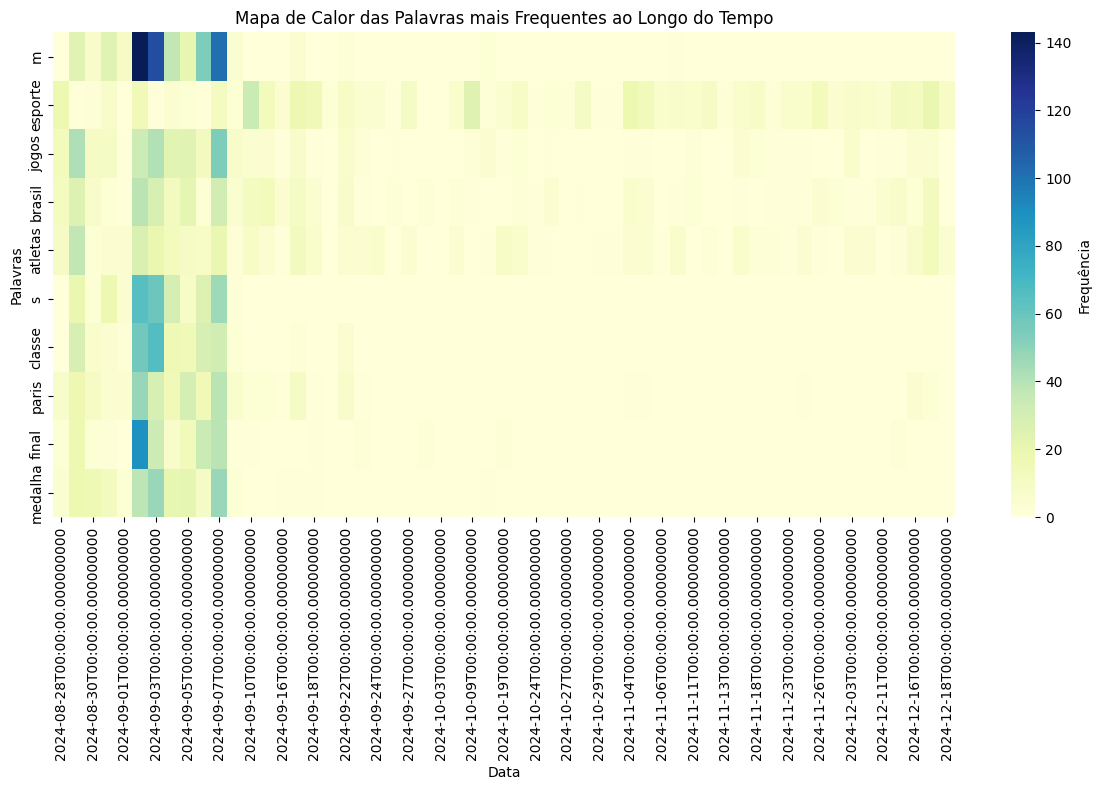

In [37]:
import seaborn as sns
df = pd.DataFrame(dados)
df["data"] = pd.to_datetime(df["data"], errors="coerce")
df = df.dropna(subset=["data"])
df["contagem"] = df["texto"].apply(contar_palavras)

freq_dia = df.groupby("data")["contagem"].sum()
freq_df = pd.DataFrame(freq_dia.items(), columns=["data", "contagem"]).sort_values("data")

todas_as_palavras = Counter()
for c in freq_df["contagem"]:
    todas_as_palavras.update(c)

top_termos = [w for w, _ in todas_as_palavras.most_common(10)]
resultados = pd.DataFrame([{**{"data": d}, **{t: c.get(t, 0) for t in top_termos}} for d, c in freq_df.itertuples(index=False)]).set_index("data")
palavras_por_dia = resultados.fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(palavras_por_dia.T, cmap="YlGnBu", cbar_kws={'label': 'Frequência'})
plt.title("Mapa de Calor das Palavras mais Frequentes ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Palavras")
plt.tight_layout()
plt.show()


A figura acima contém o mapa de calor das 10 palavras mais frequentes por dia, para entender se há um comportamento sazonal. Como esperado, as palavras possuem maior frequência nos dias em que estavam acontecendo os jogos paralímpicos.

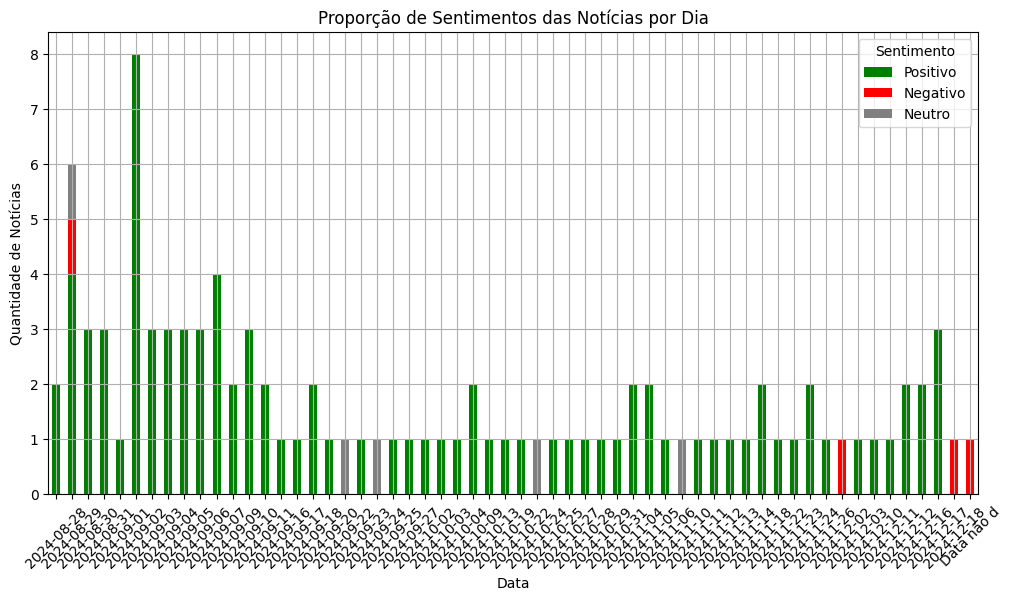

In [38]:
!pip install vaderSentiment
import json
import pathlib
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

noticias = [json.load(f.open(encoding="utf-8")) for f in pathlib.Path("data").glob("*.json")]
dados = [{"data": n["data"][:10], "texto": n["texto"].lower()} for n in noticias]

df = pd.DataFrame(dados)

def calcular_sentimento(texto):
    score = SentimentIntensityAnalyzer().polarity_scores(texto)['compound']
    return 'positivo' if score >= 0.05 else 'negativo' if score <= -0.05 else 'neutro'

df["sentimento"] = df["texto"].apply(calcular_sentimento)
sentimentos_por_dia = df.groupby(["data", "sentimento"]).size().unstack(fill_value=0)

sentimentos_por_dia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["green", "red", "gray"])
plt.title("Proporção de Sentimentos das Notícias por Dia")
plt.xlabel("Data")
plt.ylabel("Quantidade de Notícias")
plt.xticks(rotation=45)
plt.legend(title="Sentimento", labels=["Positivo", "Negativo", "Neutro"])
plt.grid(True)
plt.show()



Por último, realizei um grafico de barras que mapeia a quantidade de notícias por sentimento, ou seja, se a notícia possui um viés negativo, positivo ou neutro.
Neste caso há poucas noticias que a pontuação `compound` estimou como negativo. Entrando nessas notícias não encontrei a causa do algortimo classifica-las como sentimento negativo. Por conta disso, não acredito que seja um algoritmo confiável para o meu caso específico, sendo necessário um estudo mais aprofundado sobre o assunto.
